<a href="https://colab.research.google.com/github/dammkevin/stock_price_prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [142]:
# Acquire the stock quote
df = yf.download('AMZN', start='2017-01-01', end='2027-12-25')

# Flatten MultiIndex columns if needed
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(col).strip() for col in df.columns.values]

# Show the data
df

[*********************100%***********************]  1 of 1 completed


,Adj Close_AMZN,Close_AMZN,High_AMZN,Low_AMZN,Open_AMZN,Volume_AMZN
Date,,,,,,
2017-01-03 00:00:00+00:00,37.683498,37.683498,37.938000,37.384998,37.896000,70422000
2017-01-04 00:00:00+00:00,37.859001,37.859001,37.984001,37.709999,37.919498,50210000
2017-01-05 00:00:00+00:00,39.022499,39.022499,39.119999,38.013000,38.077499,116602000
2017-01-06 00:00:00+00:00,39.799500,39.799500,39.972000,38.924000,39.118000,119724000
2017-01-09 00:00:00+00:00,39.846001,39.846001,40.088501,39.588501,39.900002,68922000
...,...,...,...,...,...,...
2024-11-12 00:00:00+00:00,208.910004,208.910004,209.539993,206.009995,208.369995,38942900
2024-11-13 00:00:00+00:00,214.100006,214.100006,215.089996,209.139999,209.399994,46212900
2024-11-14 00:00:00+00:00,211.479996,211.479996,215.899994,210.880005,214.160004,42620300


In [143]:
# Get the number of rows and columns in the data set
df.shape

(1983, 6)

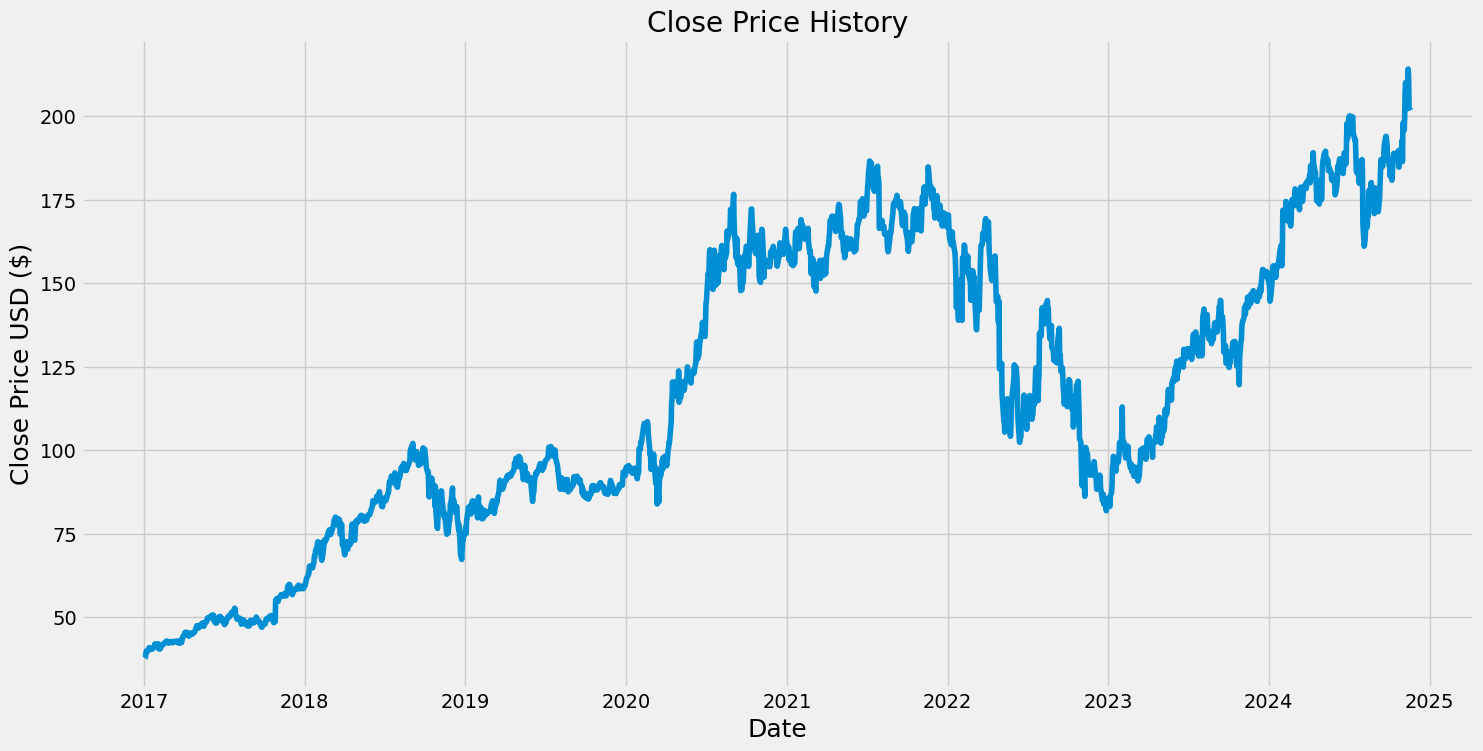

In [144]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'] if 'Close' in df.columns else df.filter(like='Close').iloc[:, 0])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [145]:
# Create a new dataframe with only the 'Close' column
if 'Close' in df.columns:
    data = df.filter(['Close'])
elif any('Close' in col for col in df.columns):
    data = df.filter(like='Close')
else:
    raise ValueError("Expected column 'Close' not found in the data.")

# Convert the dataframe to a NumPy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1587

In [146]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        , 0.        ],
       [0.00099482, 0.00099482],
       [0.00759   , 0.00759   ],
       ...,
       [0.98514872, 0.98514872],
       [0.93487001, 0.93487001],
       [0.92971174, 0.92971174]])

In [161]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])

    if i <= 61:
      print(x_train)
      print(y_train)
      print()

[array([0.        , 0.00099482, 0.00759   , 0.01199435, 0.01225794,
       0.01196883, 0.01285312, 0.01699671, 0.01798868, 0.01588571,
       0.01525085, 0.01569298, 0.01549176, 0.01819843, 0.01949082,
       0.02348137, 0.02422677, 0.02326882, 0.02174118, 0.01978557,
       0.02229951, 0.02445351, 0.01602174, 0.0152962 , 0.01667362,
       0.01871708, 0.01918473, 0.02091359, 0.02348421, 0.02344453,
       0.0252329 , 0.02564104, 0.02590463, 0.02912709, 0.02889185,
       0.02792257, 0.0259528 , 0.02691642, 0.02589611, 0.02817481,
       0.02699294, 0.02726786, 0.02634109, 0.02617386, 0.02744359,
       0.02815215, 0.0279991 , 0.02860277, 0.02801892, 0.02814363,
       0.02827118, 0.02795658, 0.02927731, 0.02537462, 0.02675204,
       0.02655931, 0.02605765, 0.0264006 , 0.02900239, 0.03419465])]
[0.03476717139139243]

[array([0.        , 0.00099482, 0.00759   , 0.01199435, 0.01225794,
       0.01196883, 0.01285312, 0.01699671, 0.01798868, 0.01588571,
       0.01525085, 0.01569298, 0.01

In [162]:
# Convert the x_train and y_train to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [163]:
# Reshape the Data b/c a LSTM model expects the data to be in 3-Dimensions

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1527, 60, 1)

In [158]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [159]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [160]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=1)

1527/1527 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - loss: 0.0037


In [165]:
# Create the testing data set

# Create a new array containing scaled values from index 1527 to 1983
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

In [166]:
# Convert the data into a NumPy array
x_test = np.array(x_test)

In [169]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [182]:
# Get the model predicted price values
predictions = model.predict(x_test)

# Create a dummy array to match the scaler's expected shape
dummy_array = np.zeros((predictions.shape[0], scaled_data.shape[1]))
dummy_array[:, 0] = predictions[:, 0]

# Perform the inverse transformation
predictions = scaler.inverse_transform(dummy_array)

# Extract the 'Close' price predictions
predictions = predictions[:, 0]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [202]:
# Ensure predictions are 1-dimensional
predictions = predictions.flatten()

# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

rmse

8.14616133769429

In [203]:
df.columns

Index(['Adj Close_AMZN', 'Close_AMZN', 'High_AMZN', 'Low_AMZN', 'Open_AMZN',
       'Volume_AMZN'],
      dtype='object')

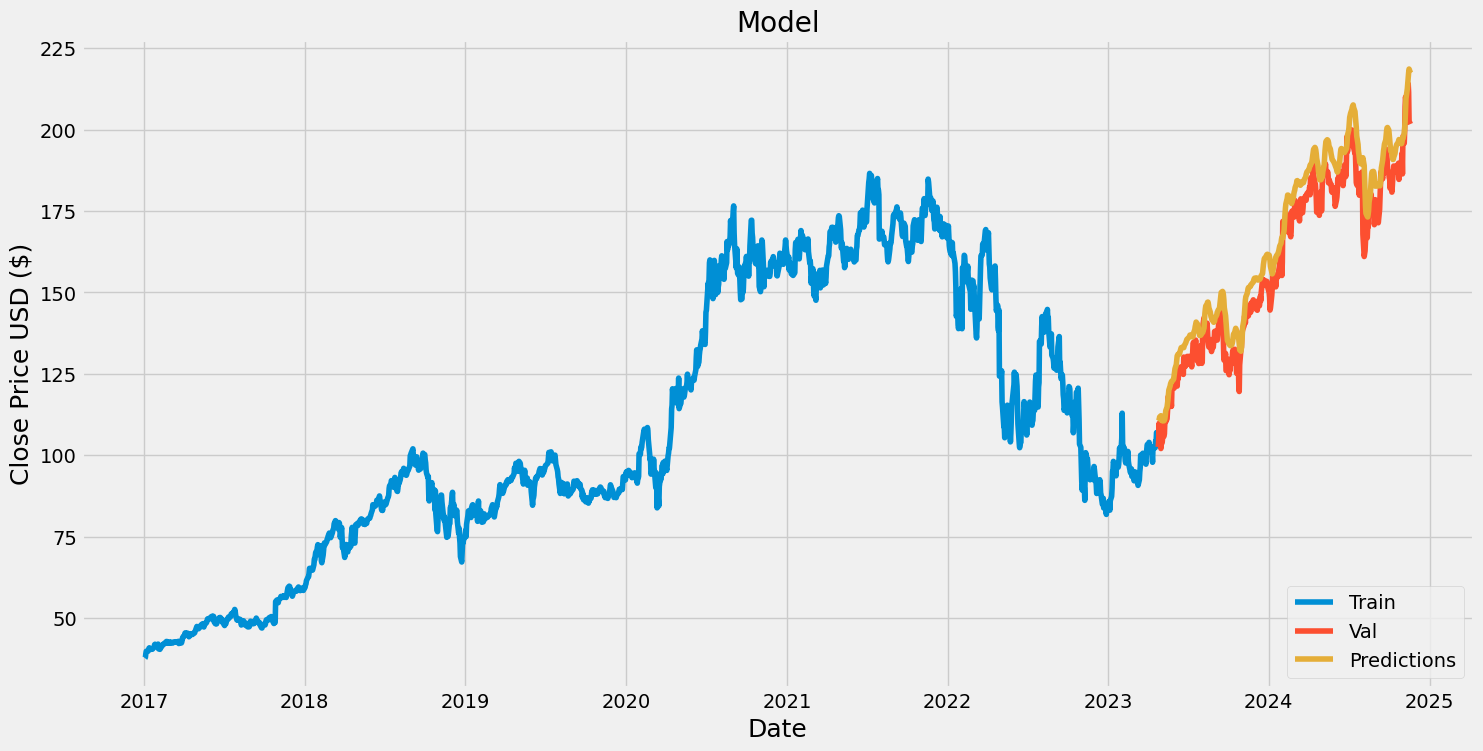

In [212]:
# Dynamically filter the column containing 'Close'
close_column = [col for col in df.columns if 'Close' in col]
if not close_column:
    raise KeyError("No column matching 'Close' found in the data.")

# Select the first match for 'Close'
data = df[[close_column[0]]]
data.columns = ['Close']  # Rename for consistency

# Split the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()  # Avoid SettingWithCopyWarning

# Add predictions
valid.loc[:, 'Predictions'] = predictions

# Plot the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot train and validation data
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [213]:
# Show the actual and predicted price
valid

,Close,Predictions
Date,,
2023-04-25 00:00:00+00:00,102.570000,110.477678
2023-04-26 00:00:00+00:00,104.980003,110.632857
2023-04-27 00:00:00+00:00,109.820000,110.814923
2023-04-28 00:00:00+00:00,105.449997,111.716652
2023-05-01 00:00:00+00:00,102.050003,112.134439
...,...,...
2024-11-12 00:00:00+00:00,208.910004,214.284443
2024-11-13 00:00:00+00:00,214.100006,215.648943
2024-11-14 00:00:00+00:00,211.479996,217.507260


In [283]:
# Predicting price of 2024-01-16

# Get the Quote
amazon_quote = yf.download('AMZN', start='2012-01-01', end='2024-01-16')

# Dynamically filter the column containing 'Close'
close_column = [col for col in amazon_quote.columns if 'Close' in col]
if not close_column:
    raise KeyError("No column matching 'Close' found in the data.")

# Select the first match for 'Close'
new_df = amazon_quote[[close_column[0]]]
new_df.columns = ['Close']  # Rename for consistency

# Get the last 60 days close price values and convert the DataFrame to an array
last_60_days = new_df[-60:].values

# Check if we have enough data for the last 60 days
if last_60_days.shape[0] < 60:
    raise ValueError(f"Not enough data for the last 60 days. Found only {last_60_days.shape[0]} rows.")

# Create a dummy array to match the scaler's expected shape
dummy_array = np.zeros((last_60_days.shape[0], scaler.n_features_in_))
dummy_array[:, 0] = last_60_days[:, 0]  # Insert 'Close' data into the first column

# Scale the data
last_60_days_scaled = scaler.transform(dummy_array)
last_60_days_scaled = last_60_days_scaled[:, 0:1]  # Extract only the scaled 'Close' column

# Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a NumPy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
dummy_array_pred = np.zeros((pred_price.shape[0], scaler.n_features_in_))
dummy_array_pred[:, 0] = pred_price[:, 0]  # Insert predictions into the first column
pred_price = scaler.inverse_transform(dummy_array_pred)
pred_price = pred_price[:, 0]  # Extract only the 'Close' predictions

print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[159.87837497]


In [286]:
# Get the stock quote for 2024-01-16

# Define ticker and date range
ticker = 'AMZN'
start_date = '2024-01-16'
end_date = '2024-01-17'

# Fetch data
amazon_quote = yf.download(ticker, start=start_date, end=end_date)

# Check if data is available
if amazon_quote.empty:
    print(f"No data found for {ticker} between {start_date} and {end_date}.")
else:
    # Extract 'Close' price for the target date if available
    if '2024-01-16' in amazon_quote.index:
        print(f"Close price for {ticker} on 2024-01-16: {amazon_quote.loc['2024-01-16', 'Close']}")
    else:
        print(f"No data found for {ticker} on 2024-01-16. Available data:")
        print(amazon_quote)


[*********************100%***********************]  1 of 1 completed

Close price for AMZN on 2024-01-16: Ticker
AMZN    153.160004
Name: 2024-01-16 00:00:00+00:00, dtype: float64
